# Transfer Learning Using Resnet18
Python 3.6

Pytorch 0.4.1

CUDA 9.2


### Loading all required Library functions

In [1]:
import numpy as np
import torch
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

import customDataExtractor
import transferCustomDataLoader
import accuracyCheck
import LossCheck
import transferTrain
import transferResnetModel

### Checking if device has a supported GPU

In [2]:
# # Check for CUDA
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# # Assume that we are on a CUDA machine, then this should print a CUDA device:
print(device)

cuda:0


### Setting Parameters

In [3]:
# Parameters
batch_size = 500
valid_size = 1000
Epoch = 10

### Loading training, validation & test datasets

In [4]:
# Extracting & obtaining all image paths & labels from zipfile
trainPath, trainLabel, testPath, testLabel = customDataExtractor.extractor('Dog-data.zip')

# Loading data from path & obtaining labels for training & testing data
trainData = transferCustomDataLoader.loader(trainPath,trainLabel)
testData = transferCustomDataLoader.loader(testPath,testLabel)

# Splitting Indices from training & validation data
indices = torch.randperm(len(trainData))
train_indices = indices[:len(indices) - valid_size]  # Taining         1 - 19 000 (19 000)
valid_indices = indices[len(indices) - valid_size:]  # Validation 19 001 - 20 000 ( 1 000)

# Making miniBatches
trainloader = DataLoader(trainData, batch_size=batch_size,
                       sampler=torch.utils.data.SubsetRandomSampler(train_indices))
validloader = DataLoader(trainData, batch_size=batch_size,
                       sampler=torch.utils.data.SubsetRandomSampler(valid_indices))
testloader = DataLoader(testData, batch_size=batch_size,
                        shuffle=True)


ZipFile found
Checking if file extracted...
File already extracted.
Image path obtained
Class labels obtained
Data Extraction Done!!


## Using ResNet 18



### Defining the NN

In [5]:
net = transferResnetModel.modifiedResnet()
net.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

### Initializing vectors to store Accuracy & Loss

In [6]:
# Initialize Accuracy List
trainAccuracy = np.zeros(1)
validAccuracy = np.zeros(1)

# Initialize Loss List
trainLoss = np.zeros(1)
validLoss = np.zeros(1)

### Training the NN
Using Adam Optimization parameters

Learning Rate =  1e-3 

Betas         = (0.9, 0.999)

In [7]:
# Train your model
for epoch in range(Epoch):  # loop over the dataset multiple times

    trainLossTemp, net = transferTrain.train(trainloader, net, 'Training', epoch)
    trainLoss = np.append(trainLoss, trainLossTemp)
    validLoss = np.append(validLoss, LossCheck.lossCheck(validloader, net, 'Validation', epoch))

    trainAccuracy = np.append(trainAccuracy, accuracyCheck.accuracyCheck(trainloader, net, 'Training'))
    validAccuracy = np.append(validAccuracy, accuracyCheck.accuracyCheck(validloader, net, 'Validation'))

print('Fin...')

[1,    38] Training loss: 0.181
[1,     2] Validation loss: 0.179
Accuracy of the network on the Training images: 94 %
Accuracy of the network on the Validation images: 93 %
[2,    38] Training loss: 0.140
[2,     2] Validation loss: 0.168
Accuracy of the network on the Training images: 95 %
Accuracy of the network on the Validation images: 94 %
[3,    38] Training loss: 0.128
[3,     2] Validation loss: 0.143
Accuracy of the network on the Training images: 96 %
Accuracy of the network on the Validation images: 94 %
[4,    38] Training loss: 0.125
[4,     2] Validation loss: 0.133
Accuracy of the network on the Training images: 96 %
Accuracy of the network on the Validation images: 95 %
[5,    38] Training loss: 0.114
[5,     2] Validation loss: 0.129
Accuracy of the network on the Training images: 96 %
Accuracy of the network on the Validation images: 95 %
[6,    38] Training loss: 0.091
[6,     2] Validation loss: 0.112
Accuracy of the network on the Training images: 96 %
Accuracy of

### Deleting the 1st value of the accuracy & loss vectors
Since the vector is initialized using zeros & rest are appended, we need to delete the 1st rogue variable.

In [8]:
# Deleting 1st index value
trainLoss = np.delete(trainLoss,0)
validLoss = np.delete(validLoss,0)
trainAccuracy = np.delete(trainAccuracy,0)
validAccuracy = np.delete(validAccuracy,0)

# Saving the network
#torch.save(net, './Save')


### Plotting the Accuracy & Loss Vs Epoch

Text(0,0.5,'Accuracy')

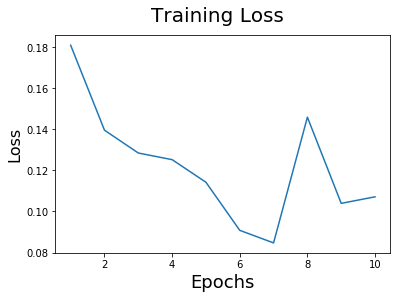

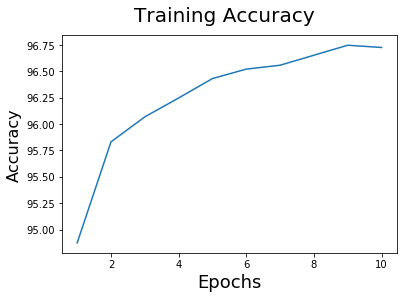

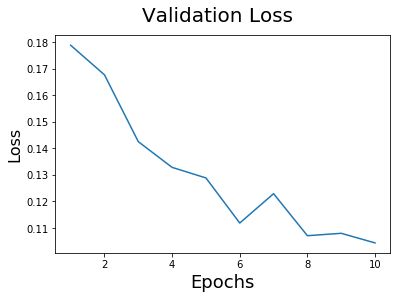

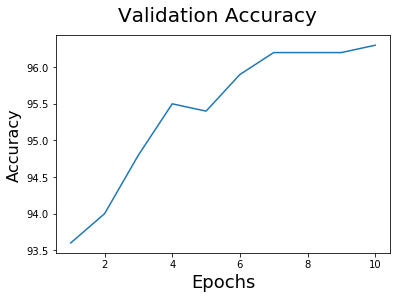

In [9]:
# Plots

# Making X axis
xAxis = np.arange(1, Epoch + 1 )


# Training loss vs. epochs
fig1 = plt.figure()
plt.plot(xAxis, trainLoss)
fig1.suptitle('Training Loss', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Loss', fontsize=16)

# Training accuracy vs. epochs
fig2 = plt.figure()
plt.plot(xAxis, trainAccuracy)
fig2.suptitle('Training Accuracy', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)

# Validation loss vs epochs
fig3 = plt.figure()
plt.plot(xAxis, validLoss)
fig3.suptitle('Validation Loss', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Loss', fontsize=16)

# Validation accuracy vs. epochs
fig4 = plt.figure()
plt.plot(xAxis, validAccuracy)
fig4.suptitle('Validation Accuracy', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)